<a href="https://colab.research.google.com/github/tadoran/netology_pyda/blob/master/Block%204%20dz_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Пользуясь новыми знаниями, проведите эксплоративный анализ данных на данных недвижимости Бостона, и попытайтесь обучить линейную модель наиболее качественно.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_boston
data = pd.read_csv(load_boston()['filename'], skiprows=1)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Посмотрим на распределение данных:

In [3]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677082,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


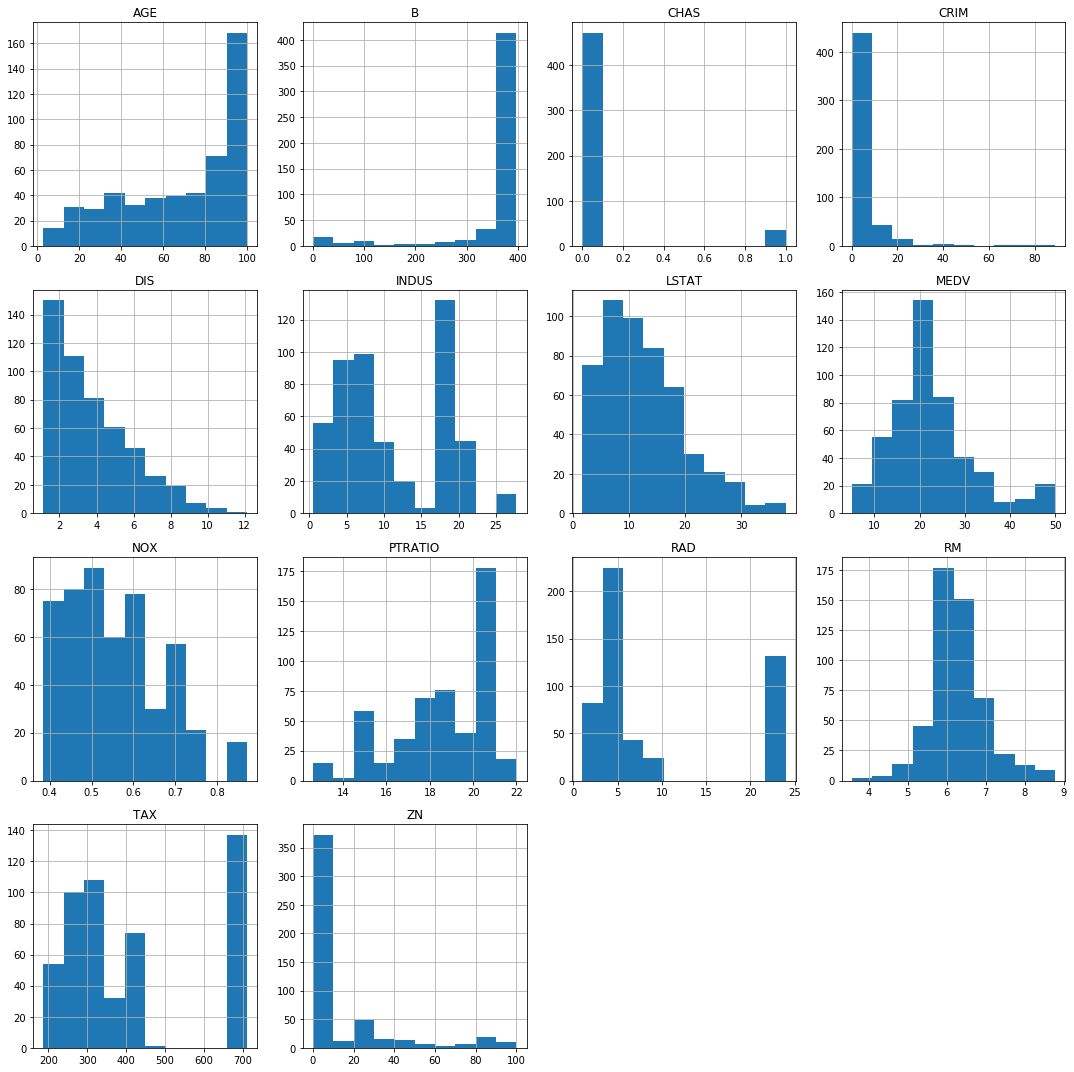

In [4]:
data.hist(figsize=(15,15))
plt.tight_layout()
plt.show()

Построим дополнительно переменные из MEDV - MaxPrice (MEDV = мax); PriceGroup (5 уровней MEDV) для лучшей визуализации

In [5]:
data["MaxPrice"] = data.MEDV >= 50
data["PriceGroup"] = pd.cut(data.MEDV, bins=5, labels=range(5)).astype(int)
data["PriceGroup"].unique()

array([2, 1, 3, 0, 4], dtype=int64)

Посмотрим на распределения

C:\Users\Gorelov\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Gorelov\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


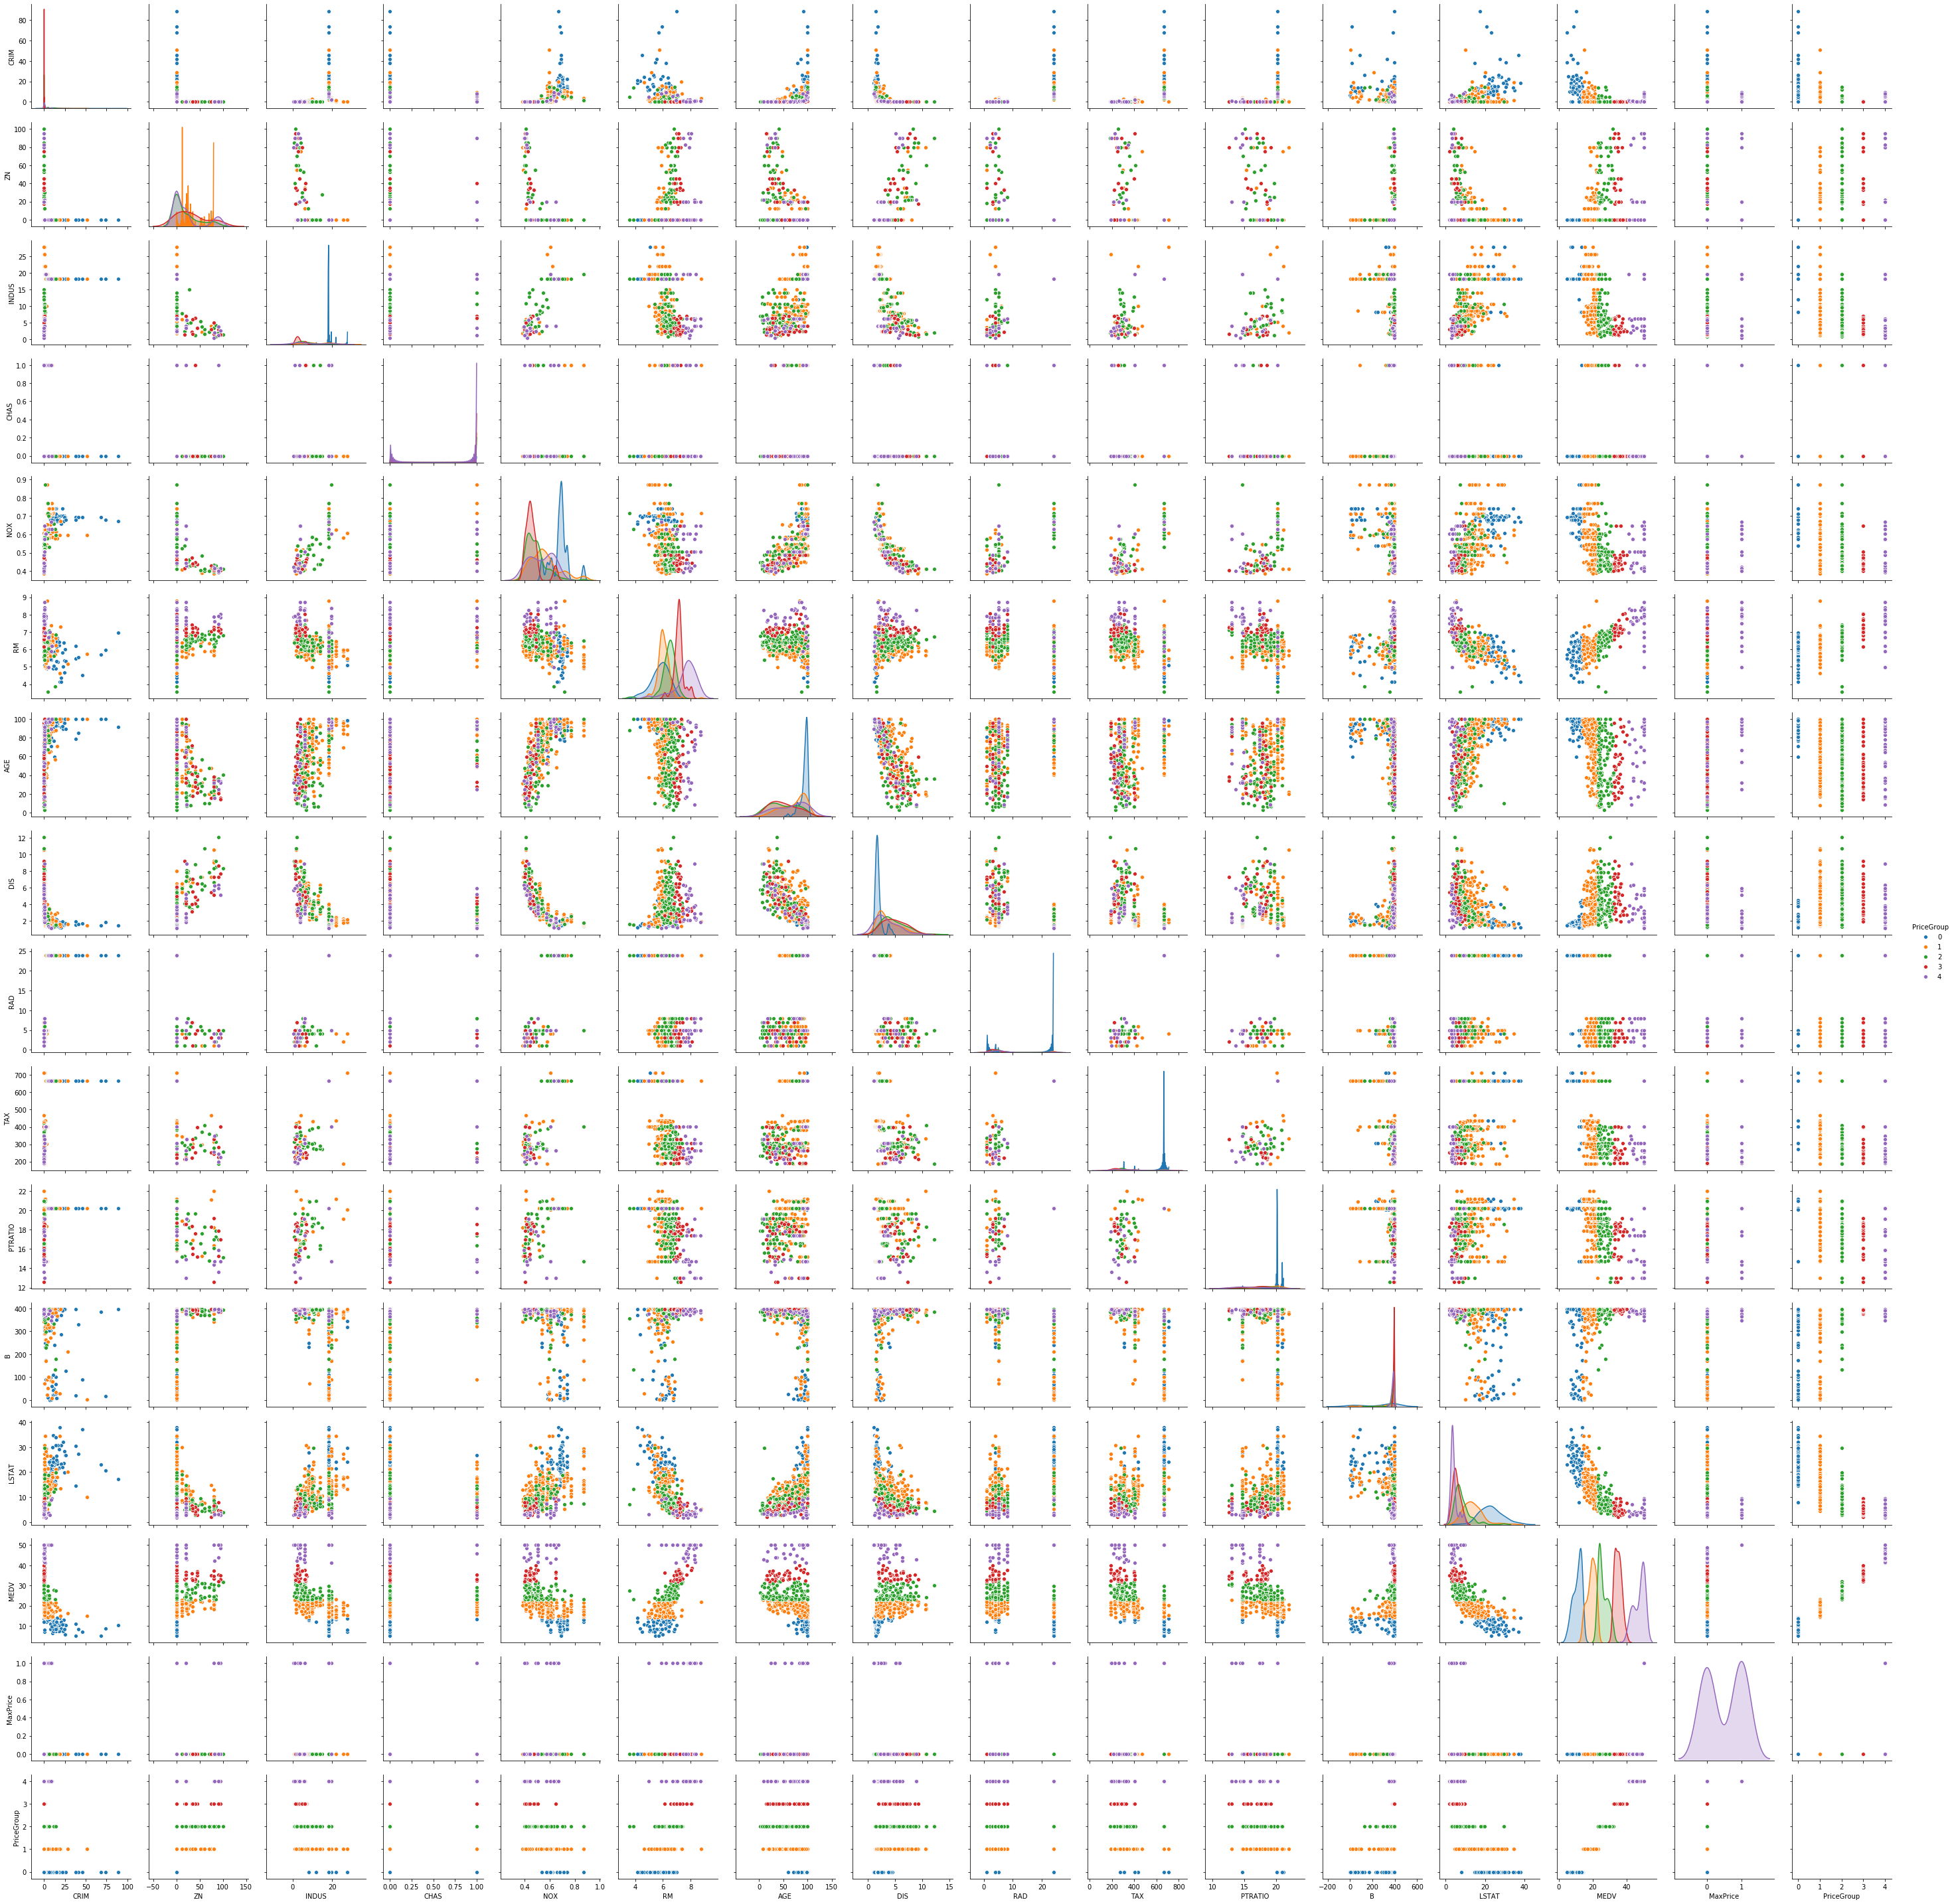

In [6]:
sns.pairplot(data, hue="PriceGroup")

Описание переменных

In [7]:
print(load_boston()['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Посмотрим матрицу корреляций

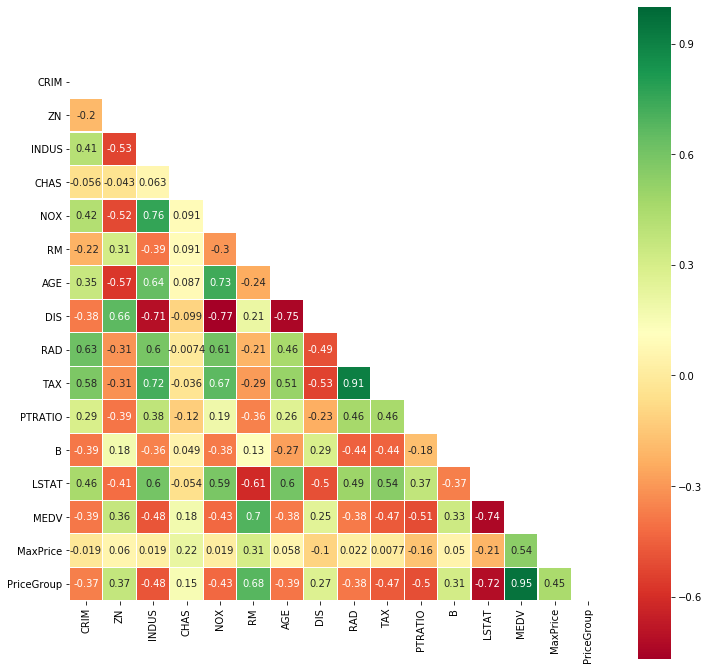

In [8]:
plt.figure(figsize = (12,12))

corr = data.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(data=corr, mask=mask, annot=True, cmap='RdYlGn', linewidths=0.2, square=True)
plt.show()

Выведем сильные корреляции (>0.4) 

In [9]:
# Значимые корреляции (> 0.4)
corrs = corr.where(corr.MEDV.abs().between(0.4,1,inclusive=False)).MEDV.dropna().index.to_list()
corrs

['INDUS', 'NOX', 'RM', 'TAX', 'PTRATIO', 'LSTAT', 'MaxPrice', 'PriceGroup']

CHAS - ни с чем сильно не коррелирует, можем спокойно удалять из сета.

In [10]:
corr[corr.abs()< 0.2].CHAS

CRIM         -0.055892
ZN           -0.042697
INDUS         0.062938
CHAS               NaN
NOX           0.091203
RM            0.091251
AGE           0.086518
DIS          -0.099176
RAD          -0.007368
TAX          -0.035587
PTRATIO      -0.121515
B             0.048788
LSTAT        -0.053929
MEDV          0.175260
MaxPrice           NaN
PriceGroup    0.154557
Name: CHAS, dtype: float64

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

model = LinearRegression()

Самые сильные корреляции - с переменными  LSTAT (-0.74) и RM (0.7)
Выведем распределение в обычной и логарифмической шкалах

C:\Users\Gorelov\Anaconda3\lib\site-packages\seaborn\regression.py:279: RuntimeWarning: invalid value encountered in log
  grid = np.c_[np.ones(len(grid)), np.log(grid)]


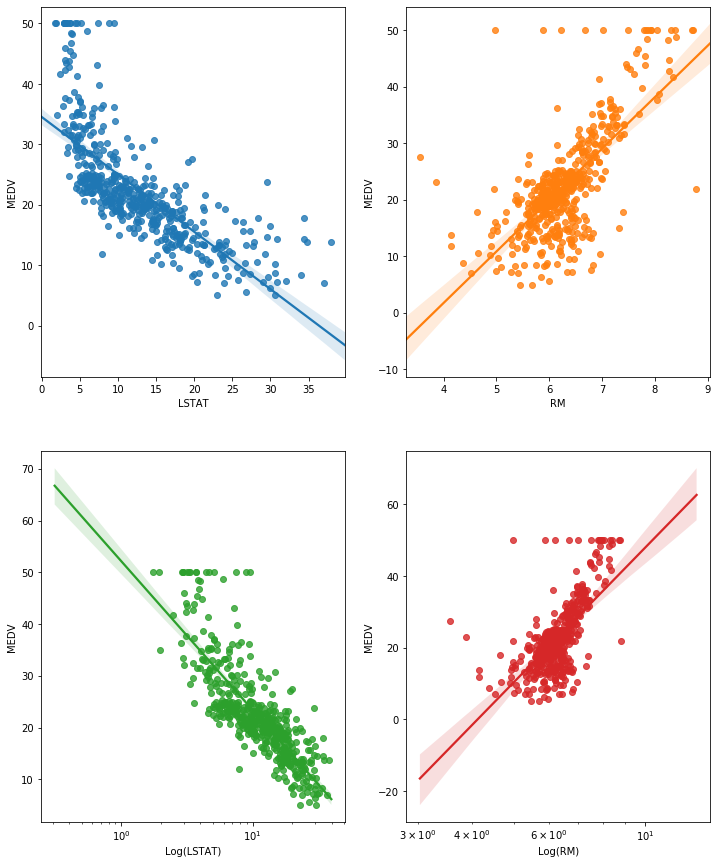

In [12]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,15))
ax = axes.flatten()

sns.regplot(y=data.MEDV, x=data.LSTAT, data=data, ax=ax[0])
ax[0].set(xlabel="LSTAT")

sns.regplot(y=data.MEDV, x=data.RM, data=data, ax=ax[1])
ax[1].set(xlabel="RM")

sns.regplot(y=data.MEDV, x=data.LSTAT, data=data, ax=ax[2],logx=True)
ax[2].set(xscale="log", xlabel="Log(LSTAT)")

sns.regplot(y=data.MEDV, x=data.RM, data=data, ax=ax[3],logx=True)
ax[3].set(xscale="log", xlabel="Log(RM)")
plt.show()

LSTAT в логарифмической шкале отображает линейную зависимость ровнее, чем в обычной. Будем иметь в виду.  
Данные в наблюдениях, где MEDV = 50, кажется, сильно искажают картину. Возможно, эти наблюдения надо будет исключить для увеличения точности предсказания менее дорогих домов.  
Попробуем повторить, убрав эти наблюдения.

In [13]:
data_2 = data[data.MaxPrice == False]
maxPriceCount = len(data[data.MaxPrice==True])
totalCount = len(data)
maxPricePercent = maxPriceCount / totalCount
print(f"Medv = 50: {maxPriceCount}, или ({maxPricePercent:0.2%} от всех наблюдений]") 

Medv = 50: 16, или (3.16% от всех наблюдений]


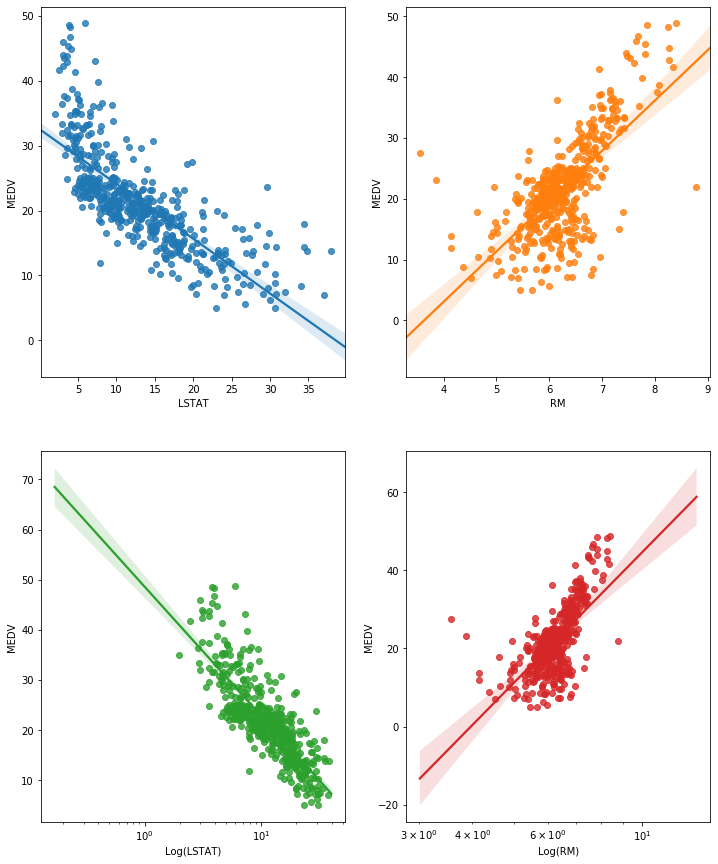

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,15))
ax = axes.flatten()

sns.regplot(y=data_2.MEDV, x=data_2.LSTAT, data=data_2, ax=ax[0])
ax[0].set(xlabel="LSTAT")

sns.regplot(y=data_2.MEDV, x=data_2.RM, data=data_2, ax=ax[1])
ax[1].set(xlabel="RM")

sns.regplot(y=data_2.MEDV, x=data_2.LSTAT, data=data_2, ax=ax[2],logx=True)
ax[2].set(xscale="log", xlabel="Log(LSTAT)")

sns.regplot(y=data_2.MEDV, x=data_2.RM, data=data_2, ax=ax[3],logx=True)
ax[3].set(xscale="log", xlabel="Log(RM)")
plt.show()

Особой разницы не заметно...

Напишем функцию, которая будет проверять результаты подгонки модели 100 раз на разных срезах

In [15]:
import statistics
def test_linear_model(features,target,test_size=0.2, test_count=100):
    '''Прогоняет линейнную регрессию указанное количество раз, возвращает min, mean, average, max, StDev, Variance''' 
    results = []
    for i in range(test_count):
        X_train, X_test, y_train, y_test = train_test_split(
            features,
            target,
            test_size = test_size,
            random_state = i
        )
        model.fit(X_train, y_train)
        results.append(model.score(X_test, y_test))
    return ({
        "Min":      min(results),
        "Median":   statistics.median(results),
        "Mean":     statistics.mean(results),
        "Max":      max(results),
        "StDev":    statistics.stdev(results),
        "Variance": statistics.variance(results)
     })

In [16]:
all_models = {}

# LSTAT & RM
Попробуем построить линейную регрессию на основании этих переменных

In [17]:
features = data[["LSTAT","RM"]].copy(deep=False)
target = data.MEDV
modelDescr = "LSTAT & RM"
modelStats = test_linear_model(features,target)
all_models[modelDescr] = modelStats
print(modelStats)

{'Min': 0.36597232817494896, 'Median': 0.6204083276288347, 'Mean': 0.6165725336628028, 'Max': 0.7617231986910025, 'StDev': 0.0704563466672575, 'Variance': 0.004964096785696767}


# Log (LSTAT, RM)
Логарифм от LSTAT выше показался более точным, чем сам LSTAT, попробуем проверить

In [18]:
features = data[["LSTAT","RM"]].copy(deep=False)
# Логарифм от LSTAT
features["LSTAT"] = np.log(data["LSTAT"])
target = data.MEDV

modelDescr = "Log (LSTAT, RM)"
modelStats = test_linear_model(features,target)
all_models[modelDescr] = modelStats
print(modelStats)

{'Min': 0.4736088331732288, 'Median': 0.6907442962461481, 'Mean': 0.6895447502692416, 'Max': 0.8242771825070442, 'StDev': 0.05987735118012098, 'Variance': 0.0035852971843475354}


# Log(LSTAT)

In [24]:
features = data[["LSTAT"]].copy(deep=False)
# Логарифм от LSTAT
features["LSTAT"] = np.log(data["LSTAT"])
target = data.MEDV

modelDescr = "Log (LSTAT)"
modelStats = test_linear_model(features,target)
all_models[modelDescr] = modelStats
print(modelStats)

{'Min': 0.48890035953707844, 'Median': 0.6490989425391204, 'Mean': 0.6497691093007639, 'Max': 0.755945432100737, 'StDev': 0.056938439829458495, 'Variance': 0.0032419859302128652}


# Log(RM)

In [25]:
features = data[["RM"]].copy(deep=False)
# Логарифм от RM
features["RM"] = np.log(data["RM"])
target = data.MEDV

modelDescr = "Log (RM)"
modelStats = test_linear_model(features,target)
all_models[modelDescr] = modelStats
print(modelStats)

{'Min': 0.05369462036454231, 'Median': 0.4358563310766542, 'Mean': 0.4224591662375242, 'Max': 0.6494013021860859, 'StDev': 0.1259253742953372, 'Variance': 0.015857199891420773}


# Все сильные корреляции

Попробуем построить модель по всем "сильным" коррекляциям - ['INDUS', 'NOX', 'RM', 'TAX', 'PTRATIO', 'LSTAT']

In [19]:
strong_corrs = ['INDUS', 'NOX', 'RM', 'TAX', 'PTRATIO', 'LSTAT']
features = data[strong_corrs].copy(deep=False)
target = data.MEDV

modelDescr = "All strong"
modelStats = test_linear_model(features,target)
all_models[modelDescr] = modelStats
print(modelStats)

{'Min': 0.45317245364123226, 'Median': 0.6596624845447229, 'Mean': 0.6543518690088446, 'Max': 0.8071671787673921, 'StDev': 0.07522689871652452, 'Variance': 0.0056590862905062395}


Попробуем аналогичным способом логорифмировать LSTAT

In [20]:
features = data[strong_corrs].copy(deep=False)
# Логарифм от LSTAT
features["LSTAT"] = np.log(data["LSTAT"])
target = data.MEDV

modelDescr = "All strong + log(LSTAT)"
modelStats = test_linear_model(features,target)
all_models[modelDescr] = modelStats
print(modelStats)

{'Min': 0.5212914206170662, 'Median': 0.7151754600881983, 'Mean': 0.7135534450573484, 'Max': 0.839999811173869, 'StDev': 0.06324642433426525, 'Variance': 0.004000110191069939}


Кажется, неплохо... 

Попробуем нормализовать все переменные. Если результат регрессии улучшится относительно ненормализованного - применим к наииболее эффективной

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [22]:
features = data[strong_corrs].copy(deep=False)
features[features.columns] = scaler.fit_transform(features[features.columns])
target = data.MEDV


modelDescr = "All stong Norm"
modelStats = test_linear_model(features,target)
all_models[modelDescr] = modelStats
print(modelStats)

{'Min': 0.45317245364123193, 'Median': 0.6596624845447229, 'Mean': 0.6543518690088449, 'Max': 0.8071671787673913, 'StDev': 0.07522689871652473, 'Variance': 0.005659086290506269}


Положительного эффекта не наблюдается.. 

In [23]:
features = data[strong_corrs].copy(deep=False)
# Логарифм от LSTAT
features["LSTAT"] = np.log(data["LSTAT"])
features = data[strong_corrs].copy(deep=False)
features[features.columns] = scaler.fit_transform(features[features.columns])
target = data.MEDV


modelDescr = "All strong + log(LSTAT) Norm"
modelStats = test_linear_model(features,target)
all_models[modelDescr] = modelStats
print(modelStats)

{'Min': 0.45317245364123193, 'Median': 0.6596624845447229, 'Mean': 0.6543518690088449, 'Max': 0.8071671787673913, 'StDev': 0.07522689871652473, 'Variance': 0.005659086290506269}


### Подведем итоги

In [26]:
pd.DataFrame.from_dict(all_models, orient='index').sort_values(by="Median")

,Min,Median,Mean,Max,StDev,Variance
Log (RM),0.053695,0.435856,0.422459,0.649401,0.125925,0.015857
LSTAT & RM,0.365972,0.620408,0.616573,0.761723,0.070456,0.004964
Log (LSTAT),0.488900,0.649099,0.649769,0.755945,0.056938,0.003242
All stong Norm,0.453172,0.659662,0.654352,0.807167,0.075227,0.005659
All strong,0.453172,0.659662,0.654352,0.807167,0.075227,0.005659
All strong + log(LSTAT) Norm,0.453172,0.659662,0.654352,0.807167,0.075227,0.005659
"Log (LSTAT, RM)",0.473609,0.690744,0.689545,0.824277,0.059877,0.003585
All strong + log(LSTAT),0.521291,0.715175,0.713553,0.840000,0.063246,0.004000


Лучше остальных отработала модель с логарифмом LSTAT + все "сильные" кореляции.  
Хотя в целом, качество модели оставляет желать лучшего...